# Convolutional Neural Network (CNN) Documentation

A **Convolutional Neural Network (CNN)** is a type of deep learning model commonly used for analyzing visual imagery. CNNs are particularly effective for tasks such as image classification, object detection, and image segmentation.

## Key Components

- **Convolutional Layers:** Apply filters to input data to extract features such as edges, textures, and shapes.
- **Activation Functions:** Introduce non-linearity into the network, commonly using ReLU (Rectified Linear Unit).
- **Pooling Layers:** Reduce the spatial dimensions (width and height) of the feature maps, helping to decrease computation and control overfitting. Max pooling is widely used.
- **Fully Connected Layers:** After several convolutional and pooling layers, the high-level reasoning is performed via fully connected layers.
- **Output Layer:** Produces the final prediction, often using softmax for classification tasks.

## Typical Workflow

1. **Input:** Raw image data is fed into the network.
2. **Feature Extraction:** Convolutional and pooling layers extract hierarchical features from the image.
3. **Classification:** Fully connected layers interpret these features and output class probabilities.

## Advantages

- **Automatic Feature Extraction:** Learns features directly from data, reducing the need for manual feature engineering.
- **Translation Invariance:** Capable of recognizing objects regardless of their position in the image.

## Common Applications

- Image and video recognition
- Medical image analysis
- Self-driving cars (object detection)
- Face recognition

## Example Architecture

1. Input Layer (e.g., 32x32 RGB image)
2. Convolutional Layer + ReLU
3. Pooling Layer
4. Convolutional Layer + ReLU
5. Pooling Layer
6. Fully Connected Layer
7. Output Layer (e.g., softmax for classification)

---

For implementation, popular libraries include TensorFlow and PyTorch.

**What does "convolution" mean in CNNs?**

In the context of Convolutional Neural Networks (CNNs), **convolution** is a mathematical operation that combines two sets of information: an input (such as an image) and a filter (also called a kernel). The filter slides over the input, computing a weighted sum at each position to produce a new output called a **feature map**.

- **Purpose:** To extract features like edges, textures, or patterns from the input data.
- **How it works:** At each location, the filter multiplies its values with the overlapping input values and sums the result. This highlights specific features in the input.
- **Result:** The output feature map emphasizes regions where the filter detects its target pattern.

Convolution allows CNNs to automatically learn and detect important features in images, making them highly effective for visual tasks.

| ![](./Images/CNN1.jpeg) | ![](./Images/CNN2.jpeg) |
|-------------------------|-------------------------|
| ![](./Images/CNN3.jpeg) | ![](./Images/CNN4.jpeg) |
| ![](./Images/CNN5.jpeg) | ![](./Images/CNN6.png) |


## Example: Explaining Each Layer of a CNN Using an Image

Let's consider an example where we use a CNN to classify an image of a handwritten digit (e.g., from the MNIST dataset).

### 1. **Input Layer**
- **Example:** A 28x28 grayscale image of the digit "5".
- **Role:** Receives the raw pixel values as input (shape: 28x28x1).

### 2. **First Convolutional Layer**
- **Operation:** Applies multiple filters (e.g., 32 filters of size 3x3).
- **Effect:** Each filter scans the image to detect simple features like edges or corners.
- **Output:** 32 feature maps, each highlighting different aspects of the digit.

### 3. **Activation Function (ReLU)**
- **Operation:** Applies the ReLU function to introduce non-linearity.
- **Effect:** Negative values are set to zero, helping the network learn complex patterns.

### 4. **Pooling Layer (Max Pooling)**
- **Operation:** Reduces the spatial size (e.g., from 28x28 to 14x14) by taking the maximum value in each 2x2 window.
- **Effect:** Retains the most important features while reducing computation and overfitting.

### 5. **Second Convolutional Layer**
- **Operation:** Applies more filters (e.g., 64 filters of size 3x3) to the pooled feature maps.
- **Effect:** Learns more complex features, such as shapes or combinations of edges.

### 6. **Second Pooling Layer**
- **Operation:** Further reduces the spatial size (e.g., from 14x14 to 7x7).
- **Effect:** Continues to condense information, focusing on the most prominent features.

### 7. **Flatten Layer**
- **Operation:** Converts the 3D feature maps into a 1D vector.
- **Effect:** Prepares the data for the fully connected layers.

### 8. **Fully Connected (Dense) Layer**
- **Operation:** Each neuron is connected to all outputs from the previous layer.
- **Effect:** Combines features to make predictions about the image.

### 9. **Output Layer**
- **Operation:** Uses softmax activation to output probabilities for each class (digits 0–9).
- **Effect:** The class with the highest probability is the predicted digit.

---

**Summary:**  
Each layer in a CNN transforms the input image, extracting increasingly complex features, and ultimately enables the network to make accurate predictions.

# CNN Operation from scratch

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  17
   47  47  47  16 129  85  47   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  75 153 217
  253 253 253 215 246 253 253   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  35 142 244 252 253 253
  253 253 253 253 253 253 253   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 253 253 253 253 253
  253 253 213 170 170 170 170   0   0   0]
 [  0   0   0   0   0   0   0   0  20 132  72   0  57 238 227 23

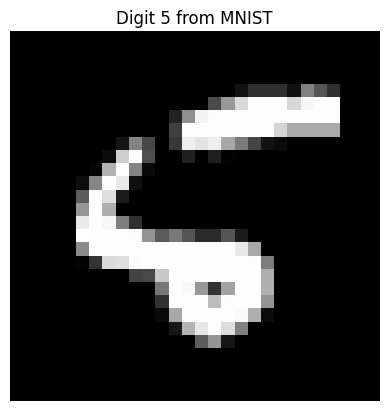

In [2]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

# Load MNIST data
(_, _), (x_test, y_test) = mnist.load_data()

# Find the first image of digit 5 in the test set
idx = (y_test == 5).nonzero()[0][0]
img = x_test[idx]

# Print the image as an array
print(img)

# Display the image
plt.imshow(img, cmap='gray')
plt.title('Digit 5 from MNIST')
plt.axis('off')
plt.show()

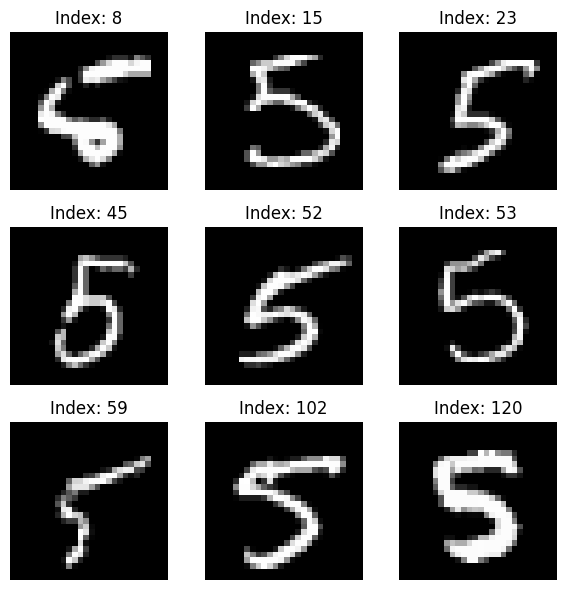

In [3]:
# Find indices of all digit 5s in the test set
indices_5 = (y_test == 5).nonzero()[0][:9]

# Plot 9 images of digit 5 in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[indices_5[i]], cmap='gray')
    ax.set_title(f'Index: {indices_5[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Filters in CNN

### Filters in the First Convolutional Layer

In a typical CNN, the **first convolutional layer** applies multiple filters (also called kernels) to the input image. Each filter is a small matrix (e.g., 3x3 or 5x5) that slides over the image to extract specific features. The weights of these filters are learned during training.

#### Common Types of Filters

- **Edge Detectors:** Highlight edges in different directions (horizontal, vertical, diagonal).
- **Sharpening Filters:** Enhance fine details and outlines.
- **Blur/Smoothing Filters:** Reduce noise and detail.

#### Example: Sobel Filter

In this notebook, we manually applied a **Sobel filter** (a type of edge detector) as an example:

```
[[ 1,  0, -1],
 [ 2,  0, -2],
 [ 1,  0, -1]]
```

This filter detects vertical edges by emphasizing changes in pixel intensity from left to right.

#### In Practice

- The first convolutional layer in a trained CNN typically uses **dozens of filters** (e.g., 32 or 64), each initialized randomly and then optimized to detect useful low-level features.
- Each filter produces a separate **feature map** that highlights where the corresponding feature appears in the input image.

#### Visualization

- The output after applying each filter is a new image (feature map) showing the presence of the detected feature.
- Stacking all feature maps together forms the output of the first convolutional layer, which is then passed to the next layer for further processing.

---

**Summary:**  
The first convolutional layer uses multiple filters to extract basic visual features such as edges and textures. These filters are learned automatically during training and are crucial for building hierarchical feature representations in CNNs.

### End to End forward propogation for few 5 digit images

In [4]:
import numpy as np
from scipy.signal import convolve2d

# Select one of the digit 5 images (e.g., the first one)
img_5 = x_test[indices_5[0]]

# Define a simple 3x3 edge detection filter (Sobel filter)
sobel_filter = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])

# Apply convolution (simulate first conv layer, no activation)
conv_result = convolve2d(
    img_5,           # input image (2D array)
    sobel_filter,    # filter/kernel to apply
    mode='same',     # output size: same as input image
    boundary='fill', # how to handle borders: pad with a constant value
    fillvalue=0      # value to use for padding (0 = black)
)

print(conv_result)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0    17    47    30     0   -31    82    69   -82
    -85   -47     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0    75   153   176   194    96     0  -100   157   176  -157
   -423  -347     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0    35
    142   209   260   315   302   247   102     0  

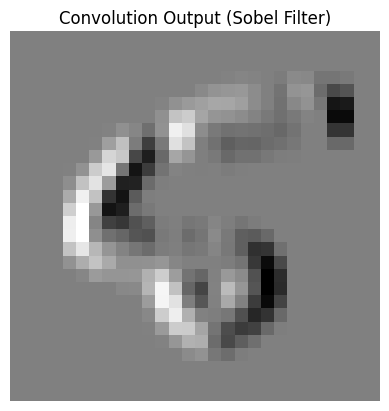

In [5]:
# The 'cmap' parameter in plt.imshow() specifies the color map used to display the image.
# A color map is a mapping from data values to colors. For grayscale images, 'gray' is commonly used,
# which displays low values as black and high values as white. Other color maps can show data in different color schemes.
# Example: cmap='gray' shows the image in shades of gray.
plt.imshow(
    conv_result,      # The 2D array to display (convolution output)
    cmap='gray'       # Use grayscale colormap for visualization
)
plt.title('Convolution Output (Sobel Filter)')
plt.axis('off')
plt.show()

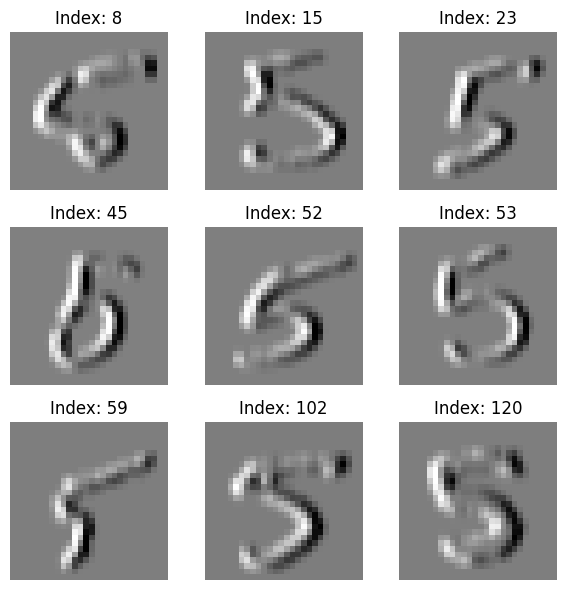

In [6]:
# Apply the Sobel filter to each of the 9 digit 5 images and display results in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img_5 = x_test[indices_5[i]]
    conv_result = convolve2d(img_5, sobel_filter, mode='same', boundary='fill', fillvalue=0)
    ax.imshow(conv_result, cmap='gray')
    ax.set_title(f'Index: {indices_5[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


### What Does "Applying a Filter" Mean in CNNs?

When we **apply a filter** (also called a kernel) to an image in a Convolutional Neural Network (CNN), we perform a mathematical operation called **convolution**. This process involves sliding the filter matrix over the image and computing a weighted sum of the pixel values covered by the filter at each position.

- **Purpose:** The filter is designed to detect specific features, such as edges or textures, in the image.
- **How it works:** At each location, the filter multiplies its values with the corresponding image pixels and sums the result. This sum becomes a single pixel in the output feature map.
- **Result:** The output is a new image (feature map) that highlights where the filter's feature (e.g., a vertical edge) appears in the original image.

In summary, **applying a filter** means using convolution to extract certain features from the input image, which helps the CNN learn to recognize patterns.


In [7]:
# Let's use a simple 3x3 image and a 2x2 filter to show how convolution works step by step

# Define a simple 3x3 image
image = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Define a simple 2x2 filter
filter_ = np.array([
    [1, 0],
    [0, -1]
])

# Manually compute the convolution output
output = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        region = image[i:i+2, j:j+2]
        output[i, j] = np.sum(region * filter_)

print("Image:\n", image)
print("\nFilter:\n", filter_)
print("\nConvolution Output:\n", output)

Image:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Filter:
 [[ 1  0]
 [ 0 -1]]

Convolution Output:
 [[-4. -4.]
 [-4. -4.]]


### Applying Activation ReLU to few 5 digit images

In [8]:
# Apply ReLU activation to the convolution results of the 9 digit 5 images and print the results
for i in range(5):
    img_5 = x_test[indices_5[i]]
    conv_result = convolve2d(img_5, sobel_filter, mode='same', boundary='fill', fillvalue=0)
    relu_result = np.maximum(conv_result, 0)
    print(f"Digit 5 at index {indices_5[i]} after ReLU:\n", relu_result)

Digit 5 at index 8 after ReLU:
 [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0   17   47   30    0    0   82   69    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    75  153  176  194   96    0    0  157  176    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0   35  142  209
   260  315  302  247  102    0    0   68  145    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  133  537  608
   295  171  144  100   36

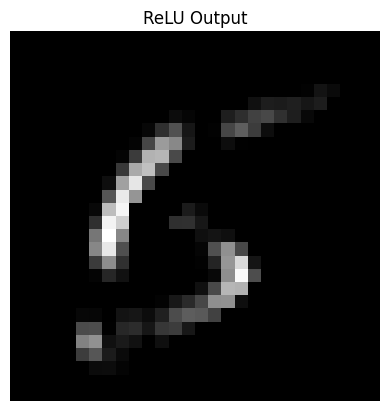

In [9]:
plt.imshow(relu_result, cmap='gray')
plt.title('ReLU Output')
plt.axis('off')
plt.show()

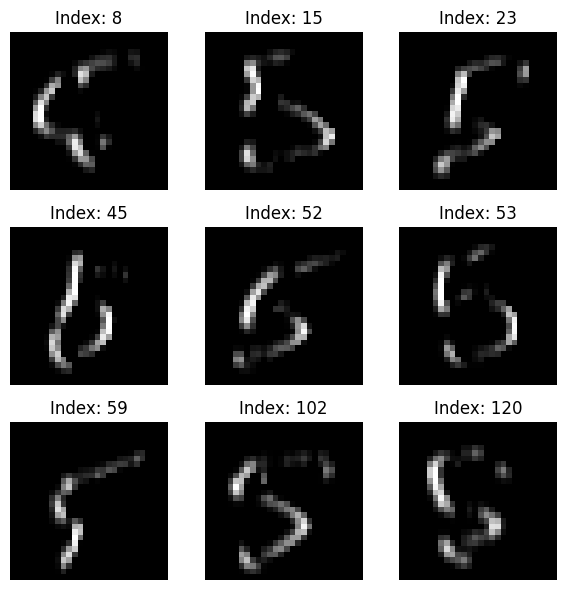

In [10]:
# Apply the Sobel filter and ReLU activation to each of the 9 digit 5 images and display results in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img_5 = x_test[indices_5[i]]
    conv_result = convolve2d(img_5, sobel_filter, mode='same', boundary='fill', fillvalue=0)
    relu_result = np.maximum(conv_result, 0)
    ax.imshow(relu_result, cmap='gray')
    ax.set_title(f'Index: {indices_5[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Applying Pooling to ReLU Activated Images

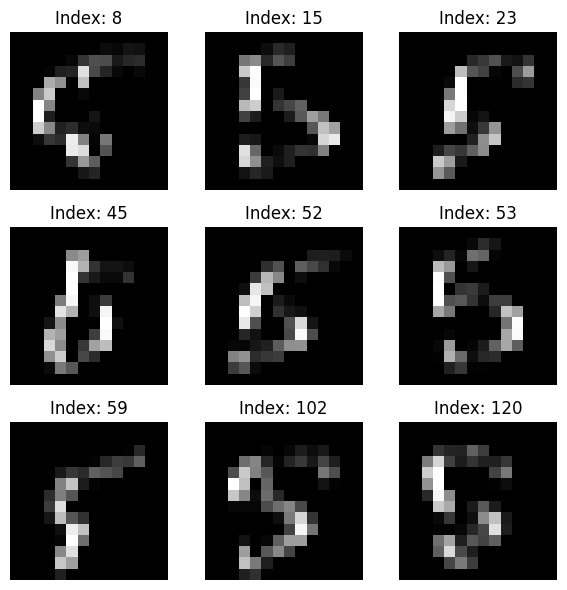

In [11]:
# Apply 2x2 max pooling to the ReLU-activated results of the 9 digit 5 images and display in a 3x3 grid
def max_pooling(img, pool_size=2):
    h, w = img.shape
    pooled = np.zeros((h // pool_size, w // pool_size))
    for i in range(0, h, pool_size):
        for j in range(0, w, pool_size):
            pooled[i // pool_size, j // pool_size] = np.max(
                img[i:i+pool_size, j:j+pool_size]
            )
    return pooled

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img_5 = x_test[indices_5[i]]
    conv_result = convolve2d(img_5, sobel_filter, mode='same', boundary='fill', fillvalue=0)
    relu_result = np.maximum(conv_result, 0)
    pooled_result = max_pooling(relu_result, pool_size=2)
    ax.imshow(pooled_result, cmap='gray')
    ax.set_title(f'Index: {indices_5[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Apply Flattening

### How Flattening Works in a CNN

**Flattening** is the process of converting a multi-dimensional array (such as a 2D pooled feature map) into a one-dimensional vector. This step is essential before passing the data to fully connected (dense) layers in a neural network.

- **Input:** A 2D array (e.g., the pooled feature map from the previous layer).
- **Operation:** The array is "unrolled" row by row (or column by column) into a single long vector.
- **Output:** A 1D vector containing all the values from the 2D array.

**Example:**  
If the pooled result is a 2D array of shape (14, 14), flattening will produce a vector of length 196 (14 × 14).

Flattening allows the spatially organized features extracted by convolutional and pooling layers to be used as input for the dense layers, which perform the final classification or regression tasks.

In [12]:
# The 14x14 shape comes from applying 2x2 max pooling to a 28x28 image (after convolution and ReLU).
# Each 2x2 block in the original image is reduced to a single value, so the output size is halved in both dimensions:
# (28 // 2, 28 // 2) = (14, 14)
# Print the shape before flattening
print("Shape before flattening:", pooled_result.shape)
# Flatten the pooled_result (2D array) into a 1D vector, simulating the flatten layer in a CNN
# Print the shape after flattening
flattened = pooled_result.flatten()
print("Shape after flattening:", flattened.shape)
print(flattened)
flattened = pooled_result.flatten()
print("Flattened output shape:", flattened.shape)
print(flattened)

Shape before flattening: (14, 14)
Shape after flattening: (196,)
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.  212.  149.  134.  389.  244.
    0.    0.    0.    0.    0.    0.    0.    0.  492.  839.  252.  111.
  206.  131.  126.  213.    0.    0.    0.    0.    0.    0.  811. 1008.
    0.    0.    0.    0.  266.  479.    0.    0.    0.    0.    0.    0.
  576. 1008.    0.    0.    0.    0.   14.   53.    0.    0.    0.    0.
    0.    0.  164.  973.  552.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.  792.  671.    0.  107.  358.  113.    0.
    0.    0.    0.    0.    0.    0.    0.   36.  220.    0.   61.  555.
  760.  106.    0.    0.    0.    0.    0.    0.    0.   15.   14.   32.
  155.  278.  887.  121.    0.    0.    0.    0.    0.    0.    0.  440.
  645.  124.  344.  264.  376.    0.    0.    0.    0.    0

In [13]:
# Pooling is a downsampling operation used in CNNs to reduce the spatial dimensions of feature maps.
# The most common type is max pooling, which takes the maximum value from each region.

# Example: 2x2 max pooling on a simple 4x4 matrix
example_matrix = np.array([
    [1, 3, 2, 4],
    [5, 6, 7, 8],
    [3, 2, 1, 0],
    [1, 2, 3, 4]
])

def simple_max_pooling(matrix, pool_size=2):
    h, w = matrix.shape
    pooled = np.zeros((h // pool_size, w // pool_size))
    for i in range(0, h, pool_size):
        for j in range(0, w, pool_size):
            pooled[i // pool_size, j // pool_size] = np.max(
                matrix[i:i+pool_size, j:j+pool_size]
            )
    return pooled

pooled_example = simple_max_pooling(example_matrix, pool_size=2)
print("Original matrix:\n", example_matrix)
print("\nAfter 2x2 max pooling:\n", pooled_example)

Original matrix:
 [[1 3 2 4]
 [5 6 7 8]
 [3 2 1 0]
 [1 2 3 4]]

After 2x2 max pooling:
 [[6. 8.]
 [3. 4.]]


### Create Fully connected Layer and output layer

In [15]:
import torch

import torch.nn as nn
import torch.nn.functional as F

# Define the network
class SimpleFCNet(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        super(SimpleFCNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SimpleFCNet(input_size, 64, 32, 10)

# Convert flattened input to torch tensor
x_tensor = torch.tensor(flattened, dtype=torch.float32)

# Forward pass
logits = model(x_tensor)
print("Logits:", logits.detach().numpy())
print("Predicted class:", torch.argmax(logits).item())


Logits: [ -7.4169726   3.1346738 -20.27393   -15.824662   10.301892   14.375765
   9.192137  -29.94094     0.9243861 -29.293781 ]
Predicted class: 5


## FAQ on Filters


## FAQ on Filters in CNNs

**Q: What is a filter in a CNN?**  
A filter, also called a kernel, is a small matrix of weights used to scan over input data via convolution to detect specific features like edges or textures.

**Q: How are filters initialized?**  
Filters are usually initialized with small random values and then optimized through training so that they learn to detect useful patterns for the task.

**Q: What is the size of filters?**  
Common filter sizes are 3×3 or 5×5, but the size can vary based on the network design.

**Q: How many filters does a convolutional layer have?**  
It varies; a layer can have anywhere from a few filters to several hundred, each detecting different features and producing a corresponding feature map.

**Q: What is the depth of a filter?**  
The depth of a filter matches the depth (number of channels) of the input volume to the convolutional layer (e.g., 3 channels for RGB images).

**Q: Are filters fixed or learned?**  
Filters in CNNs are learnable parameters that adapt through training using backpropagation, unlike traditional hand-crafted filters.

**Q: What do filters detect?**  
Filters can learn to detect edges, colors, textures, shapes, and more complex features at deeper layers.

**Q: How do filters contribute to feature maps?**  
Each filter convolves over the input producing a feature map or activation map, indicating where a specific pattern was detected.

**Q: What is the difference between filter and kernel?**  
A filter may refer to a collection of kernels; for example, in a multi-channel input, the filter contains one kernel per input channel.

**Q: Why can small filters like 3x3 or 5x5 matrices in CNNs detect edges, colors, or textures?**
A:Small filters (such as 3x3 or 5x5) are effective in detecting edges, colors, and textures because they focus on local groups of pixels and highlight specific patterns through the convolution operation. Each filter slides over the image, multiplying its weights with the underlying pixels in a small patch. This process makes the filter sensitive to certain patterns, such as sudden changes in pixel intensity (edges), specific color arrangements, or textures.

- **Local Focus:** The filter examines a small area at a time, allowing it to detect local features.
- **Pattern Matching:** The filter's weights are tuned (learned during training) to respond strongly to particular patterns, such as edges or color blobs.
- **Edge Detection Example:** A filter that emphasizes differences between adjacent pixels will produce high values at edges.
- **Learning:** CNN filters start with random weights and are optimized during training to detect the most useful features for the task.
- **Hierarchy:** Early layers detect simple features, while deeper layers combine them into more complex patterns.

In summary, the power of small filters comes from their ability to scan the entire image for specific local patterns, and their weights are learned to accentuate features that help the network recognize objects and scenes.
